In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = gpd.read_parquet('data/jaipur_economic_potential_index_re.parquet')
df.columns

Index(['hex_id', 'geometry', 'cover', 'transport_station_point',
       'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi',
       'office_poi', 'shop_poi', 'area_clip', 'pop_sum', 'builtup_sum',
       'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density',
       'PC1_Score_Original', 'PC1_Score_Corrected', 'PC2_Score', 'EPI_o',
       'EPI', 'EPI_o_Category', 'EPI_Category'],
      dtype='object')

<Axes: >

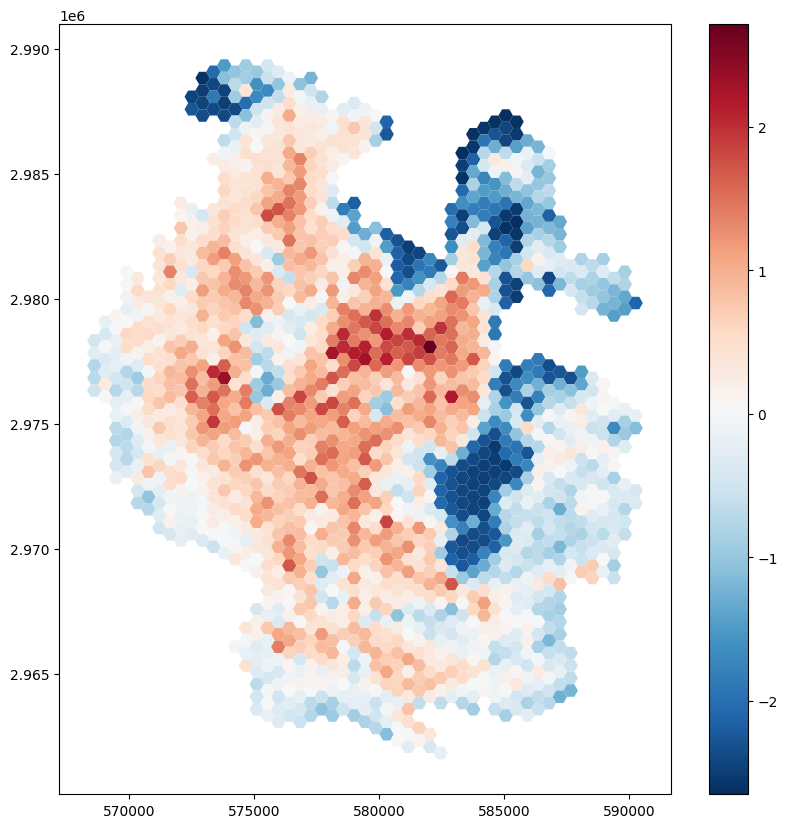

In [4]:
df.plot(column='EPI_o',cmap='RdBu_r', legend=True, figsize=(10, 10))

In [5]:
# Scale to -1 to 1
df['EPI_o'] = (df['EPI_o'] - df['EPI_o'].min()) / (df['EPI_o'].max() - df['EPI_o'].min()) * 2 - 1
df['EPI'] = (df['EPI'] - df['EPI'].min()) / (df['EPI'].max() - df['EPI'].min()) * 2 - 1

In [6]:
# Round EPI_o to 2 decimal places
df['EPI_o'] = df['EPI_o'].round(2)
df['EPI'] = df['EPI'].round(2)

In [7]:
df.to_crs(epsg=4326, inplace=True)
df.to_file('../../public/data/mapMain/jaipur_eai.geojson', driver='GeoJSON')